<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [2]:
import csv

data= []
with open('sat_scores.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
f.close()

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [3]:
df = pd.read_csv('sat_scores.csv')

In [4]:
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [5]:
df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [6]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### The data describes SAT scores


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### data_dict = 
                {
                State : describes each state in the US,dataype:object,# rows:52
                Rate : the percentage of the actual SAT test takers out of the eligible 
                candidates in each state,dataype:int,# rows:52
                Verbal :the score of the verbal portion of the SAT test,dataype:int,#rows:52
                Math : the score of the math portion of the SAT test,dataype:int,# rows:52
                }
        

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

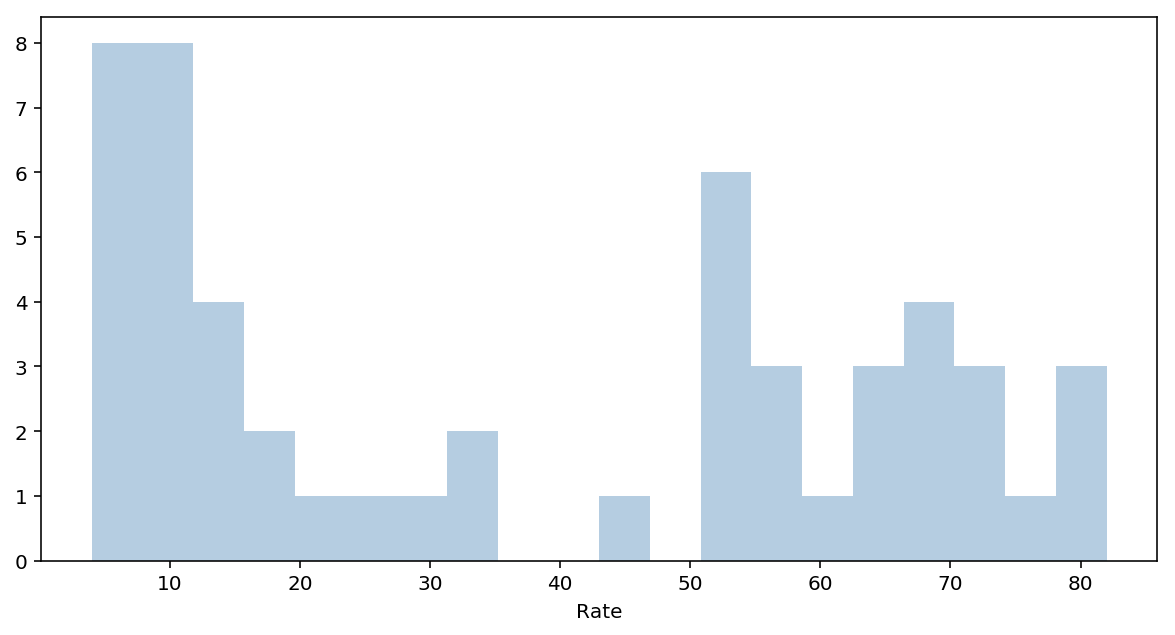

In [8]:
# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(10,5))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:

ax = sns.distplot(df['Rate'], bins=20, kde = False,color='steelblue', ax=ax)


In [9]:
#df['Rate'].hist(bins=20)

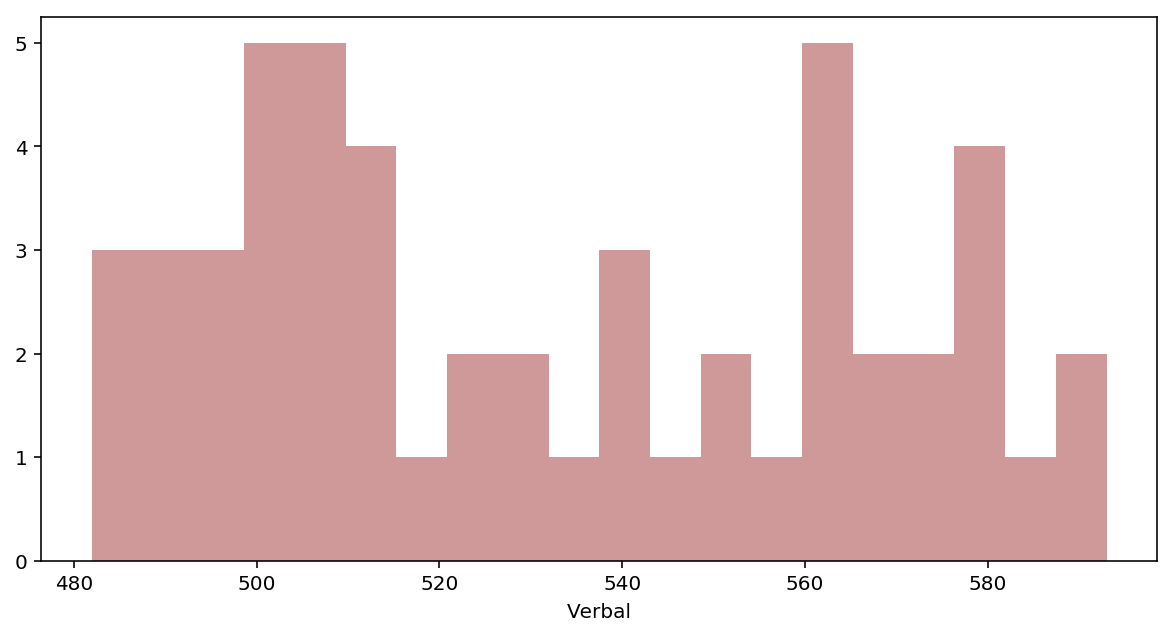

In [10]:

# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(10,5))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis :
ax = sns.distplot(df['Verbal'], bins=20, kde=False,color='darkred',ax=ax)



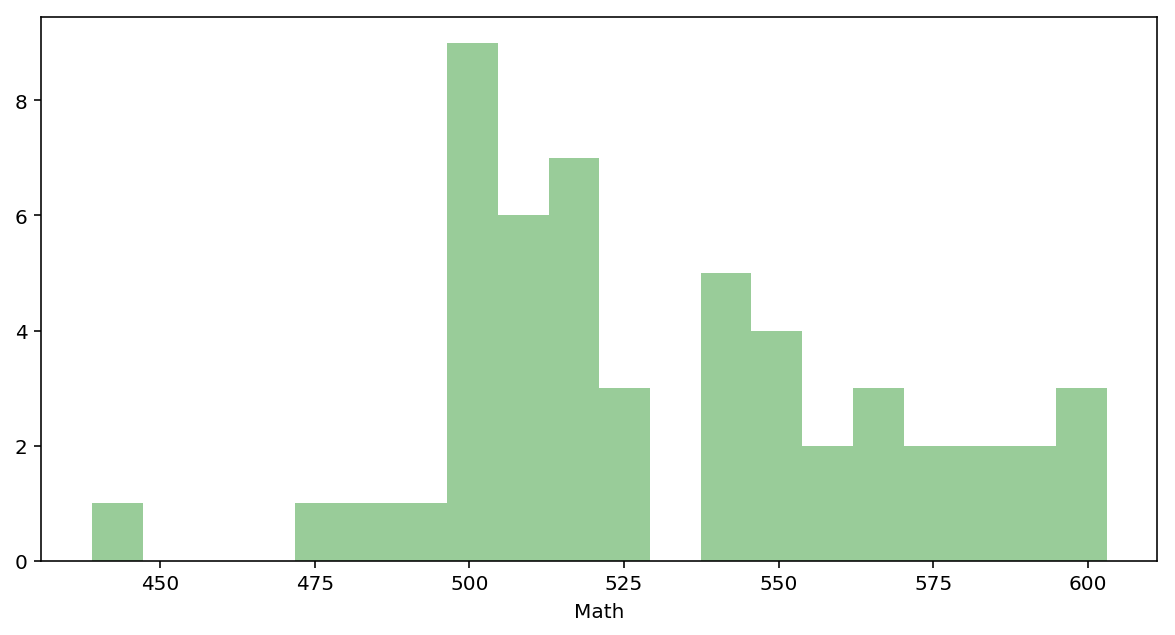

In [11]:

# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(10,5))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis 
ax = sns.distplot(df['Math'], bins=20, kde=False,color='green', ax=ax)



### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

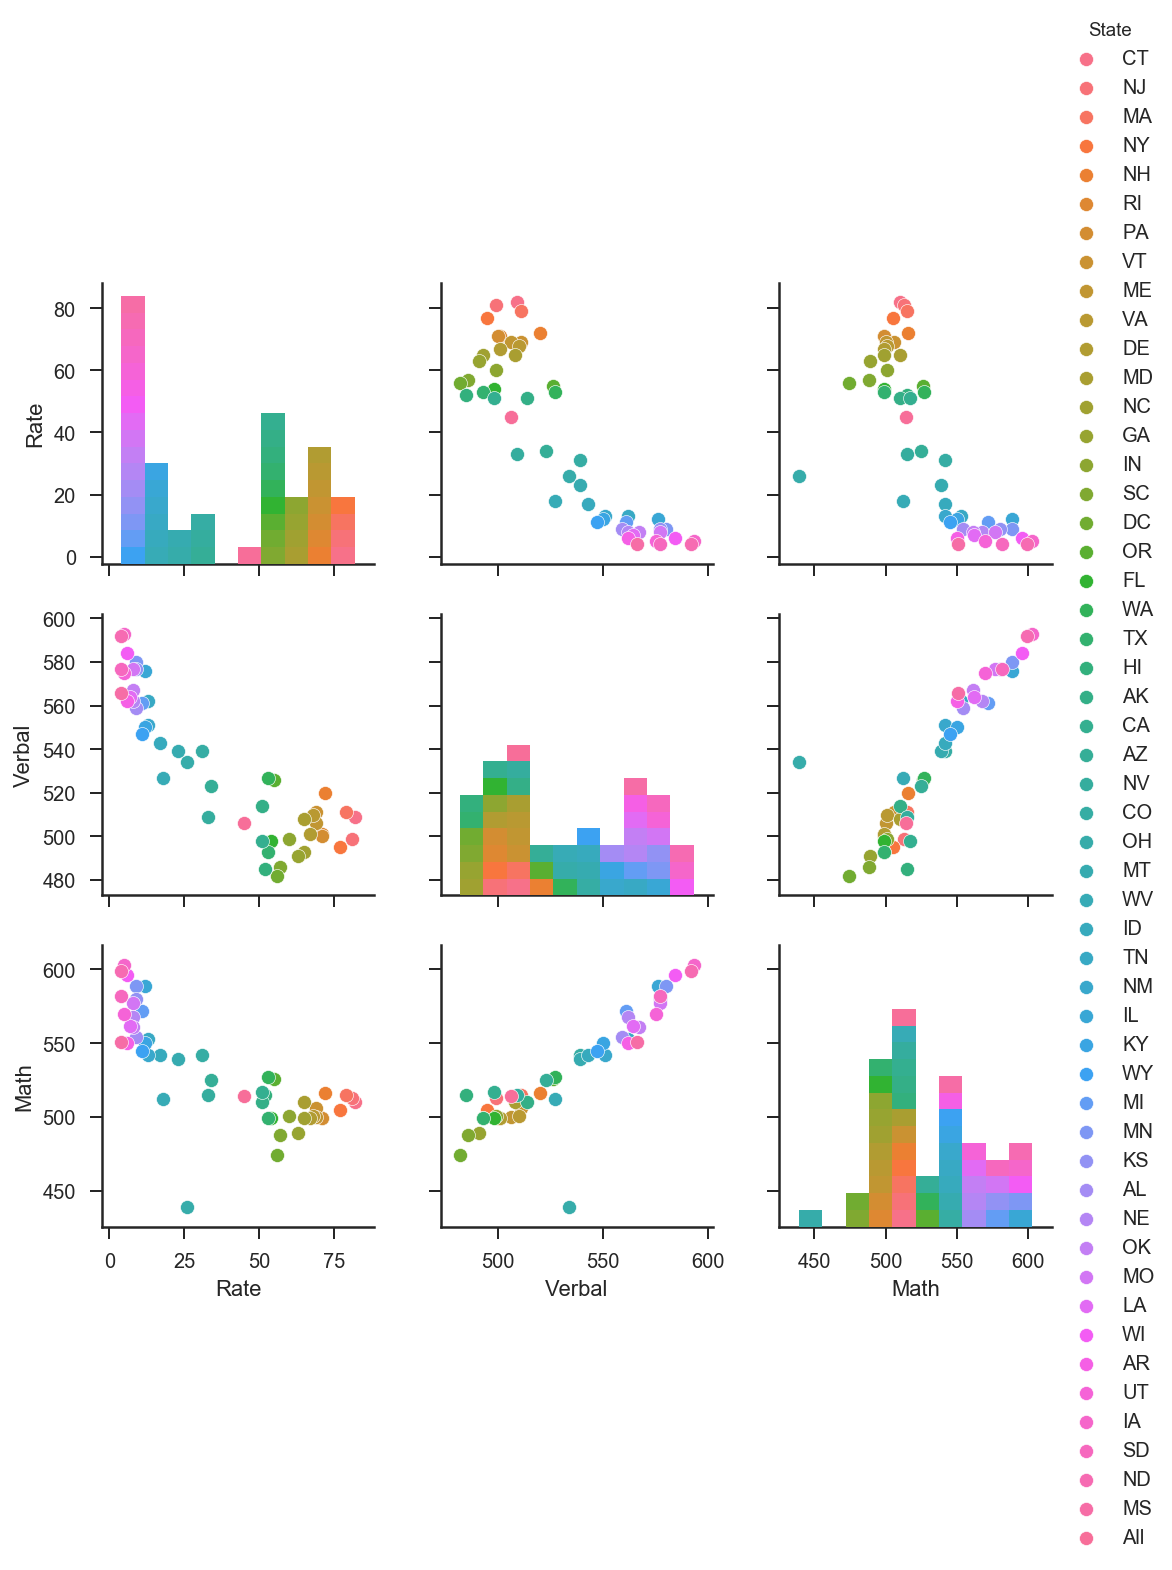

In [12]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,hue='State',palette="husl")

There is a positive relationship between Verbal and Math
But we have a negative relationship between Math and Rate

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

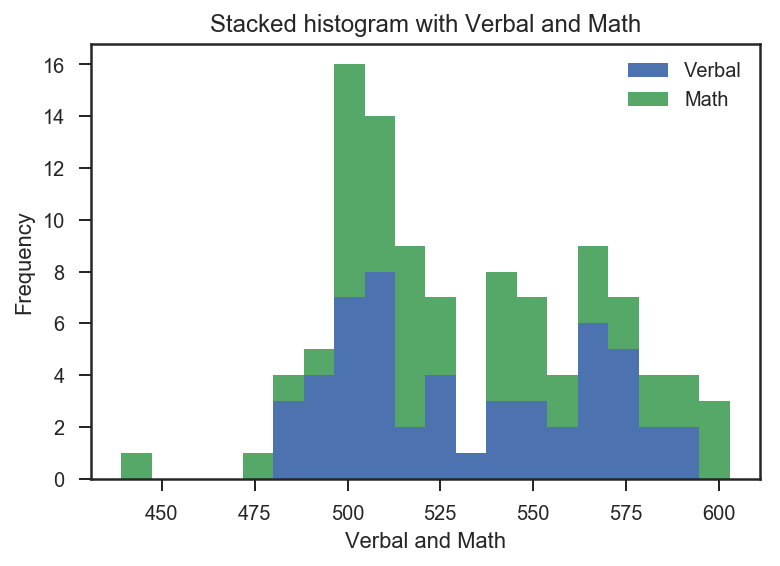

In [13]:
df[['Verbal','Math']].plot.hist(bins=20,stacked=True)
plt.title('Stacked histogram with Verbal and Math')
plt.xlabel('Verbal and Math')
plt.ylabel('Frequency')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

The fact that box plots provide more of a summary of a distribution can also be seen as an advantage in certain cases. Sometimes when we're comparing distributions we don't care about overall shape, but rather where the distributions lie with regard to one another. Plotting the quantiles side by side can be a useful way of doing this without distracting us with other details that we may not care about.
scatterplot is used to check if there is a relationship between two features

Rate is in terms of percentage (average) of test takers per state--the actual SAT test takers out of the eligible candidates in each state but Verbal and Math are scores of test takers
Since Rate does not have the same scale as Math and Verbal

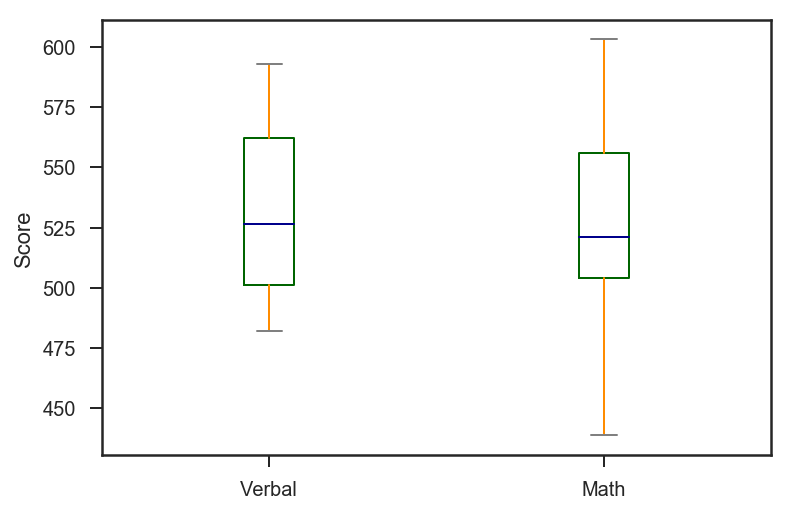

In [14]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
                medians='DarkBlue', caps='Gray')
df[['Verbal','Math']].plot.box(color=color, sym='r+')
plt.ylabel('Score')

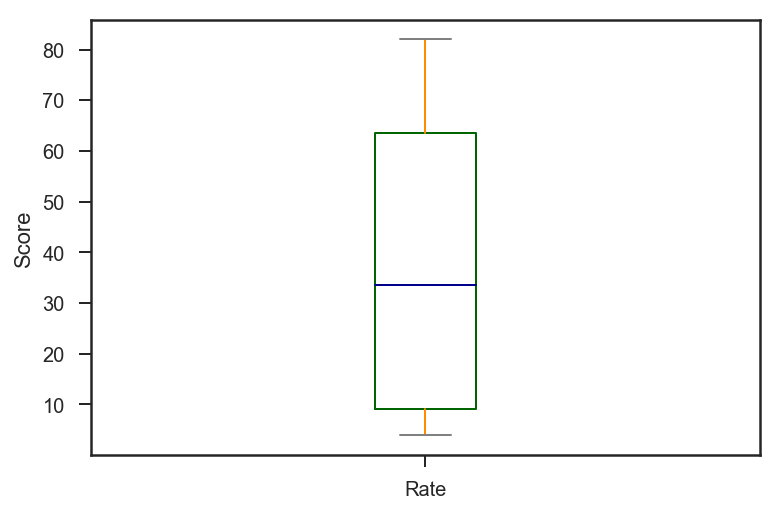

In [15]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
                medians='DarkBlue', caps='Gray')
df[['Rate']].plot.box(color=color, sym='r+')
plt.ylabel('Score')

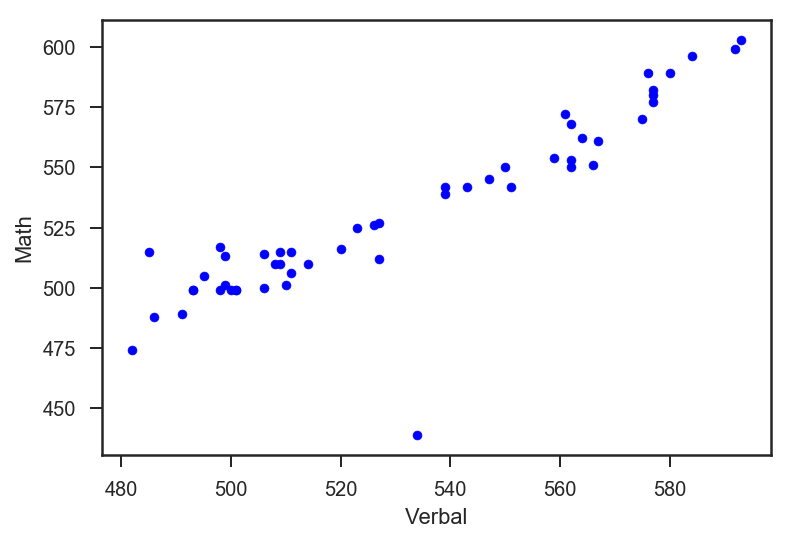

In [16]:
df[['Verbal','Math']].plot(x='Verbal', y='Math', color ='blue',kind='scatter')

In [17]:
df2=df.copy()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


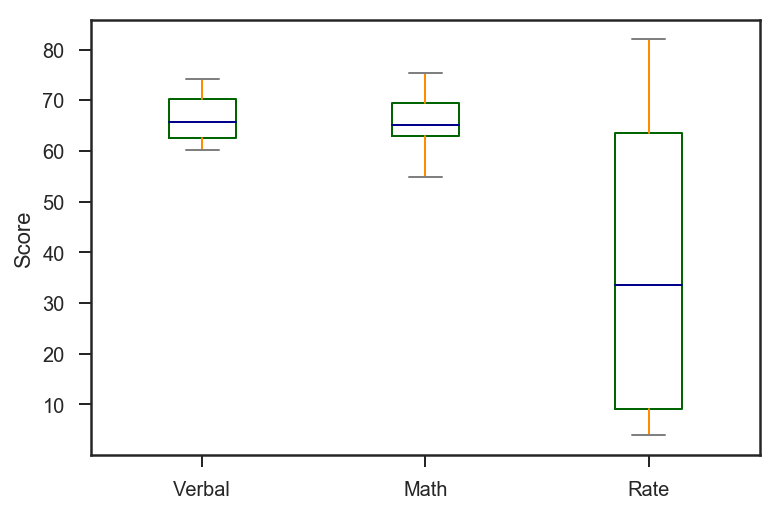

In [18]:
#Since Rate is out of 100, I just divided Math and Verbal by 8
df3=df.copy()
df3['Verbal']=df3['Verbal']/8
df3['Math']=df3['Math']/8
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
                medians='DarkBlue', caps='Gray')
df3[['Verbal','Math','Rate']].plot.box(color=color, sym='r+')
plt.ylabel('Score')

In [19]:
[row for row in data]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

In [20]:
labels = data[0]
data = data[1:]

In [21]:
state_names = [row[labels.index('State')] for row in data[1:]]
print (state_names)

['NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


In [22]:
rate_i = labels.index('Rate')
math_i = labels.index('Math')
verbal_i = labels.index('Verbal')

for row in data:
    row[rate_i] = int(row[rate_i])
    row[math_i] = int(row[math_i])
    row[verbal_i] = int(row[verbal_i])
[type(item) for item in data[0]]

[str, int, int, int]

In [23]:
state_rate = {}
state_math = {}
state_verbal = {}

for row in data:
    state_rate[row[0]] = row[rate_i]
    state_math[row[0]] = row[math_i]
    state_verbal[row[0]] = row[verbal_i]

In [24]:
data_dict = {'rate': [row[labels.index('Rate')] for row in data],
             'math': [row[labels.index('Math')] for row in data],
             'verbal': [row[labels.index('Verbal')] for row in data]
            }

In [25]:
#dictionary comprehension:
data_dict = {column_name: [row[index] for row in data] for index, column_name in enumerate(labels)}

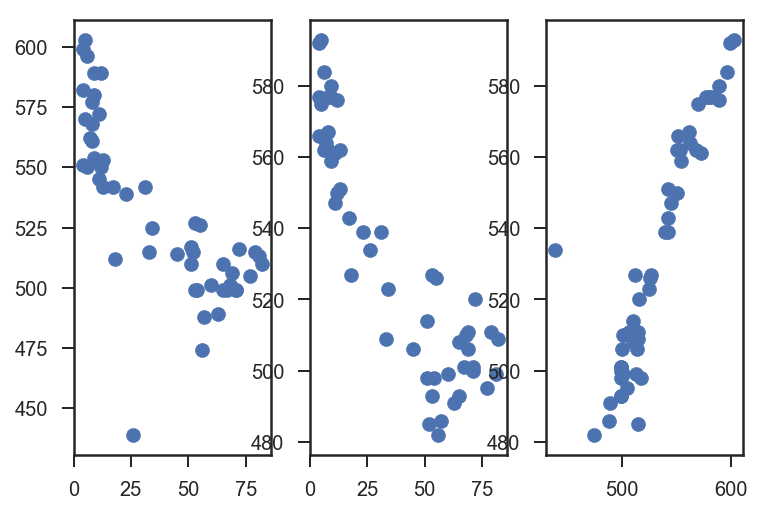

In [26]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.scatter(data_dict['Rate'], data_dict['Math'])
ax2 = fig.add_subplot(132)
ax2.scatter(data_dict['Rate'], data_dict['Verbal'])
ax3 = fig.add_subplot(133)
ax3.scatter(data_dict['Math'], data_dict['Verbal'])

{'boxes': [<matplotlib.lines.Line2D at 0x1a1b053940>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1b05ad68>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b003390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b0129e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b053b38>,
  <matplotlib.lines.Line2D at 0x1a1b05ab70>]}

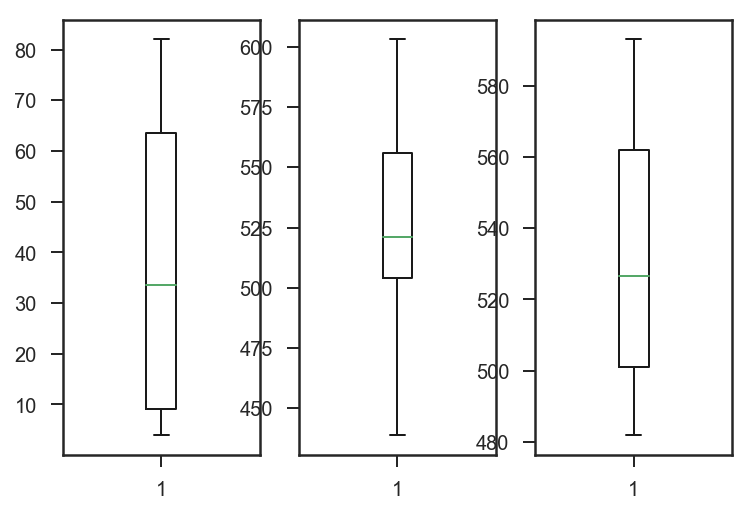

In [27]:
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.boxplot(data_dict['Rate'])
ax2 = fig.add_subplot(132)
ax2.boxplot(data_dict['Math'])
ax3 = fig.add_subplot(133)
ax3.boxplot(data_dict['Verbal'])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [28]:
data1=df['Verbal'].mean()
data1

532.0192307692307

In [29]:
data=len(df.Verbal.loc[lambda s: s > df['Verbal'].mean()])
data

24

There are 24 states that score greater than the average of Verbal scores across the entire dataset

In [30]:
df.loc[lambda df: df.Verbal > df['Verbal'].mean(), :]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [31]:
data2=df['Verbal'].median()
data2

526.5

In [32]:
data2=len(df.Verbal.loc[lambda s: s > df['Verbal'].median()])
data2

26

In [33]:
df.loc[lambda df: df.Verbal > df['Verbal'].median(), :]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [34]:
df['Verbal_Math']=df['Verbal'] - df['Math']

In [35]:
df.head()

,State,Rate,Verbal,Math,Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [36]:
data_one=df.loc[lambda df: df.Verbal > df.Math, :]
data_one

,State,Rate,Verbal,Math,Verbal_Math
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9
10,DE,67,501,499,2
13,GA,63,491,489,2
16,DC,56,482,474,8
22,AK,51,514,510,4


In [37]:
data_one=df.loc[lambda df: df.Verbal > df.Math, :].sort_values(['Verbal_Math'],ascending=False).head(10)
data_one


,State,Rate,Verbal,Math,Verbal_Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
41,OK,8,567,561,6
8,ME,69,506,500,6


In [38]:
df['Math_Verbal']=df['Math'] - df['Verbal']

In [39]:
data_two=df.loc[lambda df: df.Math > df.Verbal, :]
data_two

,State,Rate,Verbal,Math,Verbal_Math,Math_Verbal
0,CT,82,509,510,-1,1
1,NJ,81,499,513,-14,14
2,MA,79,511,515,-4,4
3,NY,77,495,505,-10,10
11,MD,65,508,510,-2,2
12,NC,65,493,499,-6,6
14,IN,60,499,501,-2,2
15,SC,57,486,488,-2,2
18,FL,54,498,499,-1,1
20,TX,53,493,499,-6,6


In [40]:
data_two=df.loc[lambda df: df.Math > df.Verbal, :].sort_values(['Math_Verbal'],ascending= False).head(10)
data_two

,State,Rate,Verbal,Math,Verbal_Math,Math_Verbal
21,HI,52,485,515,-30,30
23,CA,51,498,517,-19,19
1,NJ,81,499,513,-14,14
33,IL,12,576,589,-13,13
44,WI,6,584,596,-12,12
36,MI,11,561,572,-11,11
3,NY,77,495,505,-10,10
47,IA,5,593,603,-10,10
37,MN,9,580,589,-9,9
51,All,45,506,514,-8,8


In [41]:
data_one.head(3)

,State,Rate,Verbal,Math,Verbal_Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [42]:
data_two.head(3)

,State,Rate,Verbal,Math,Verbal_Math,Math_Verbal
21,HI,52,485,515,-30,30
23,CA,51,498,517,-19,19
1,NJ,81,499,513,-14,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


In [43]:
df_corr = df2[['Verbal','Math','Rate']].corr()

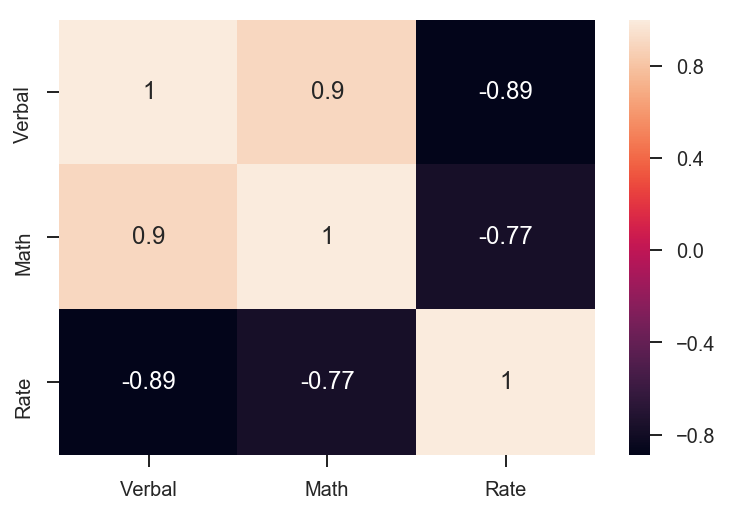

In [44]:
sns.heatmap(df_corr,annot =True)

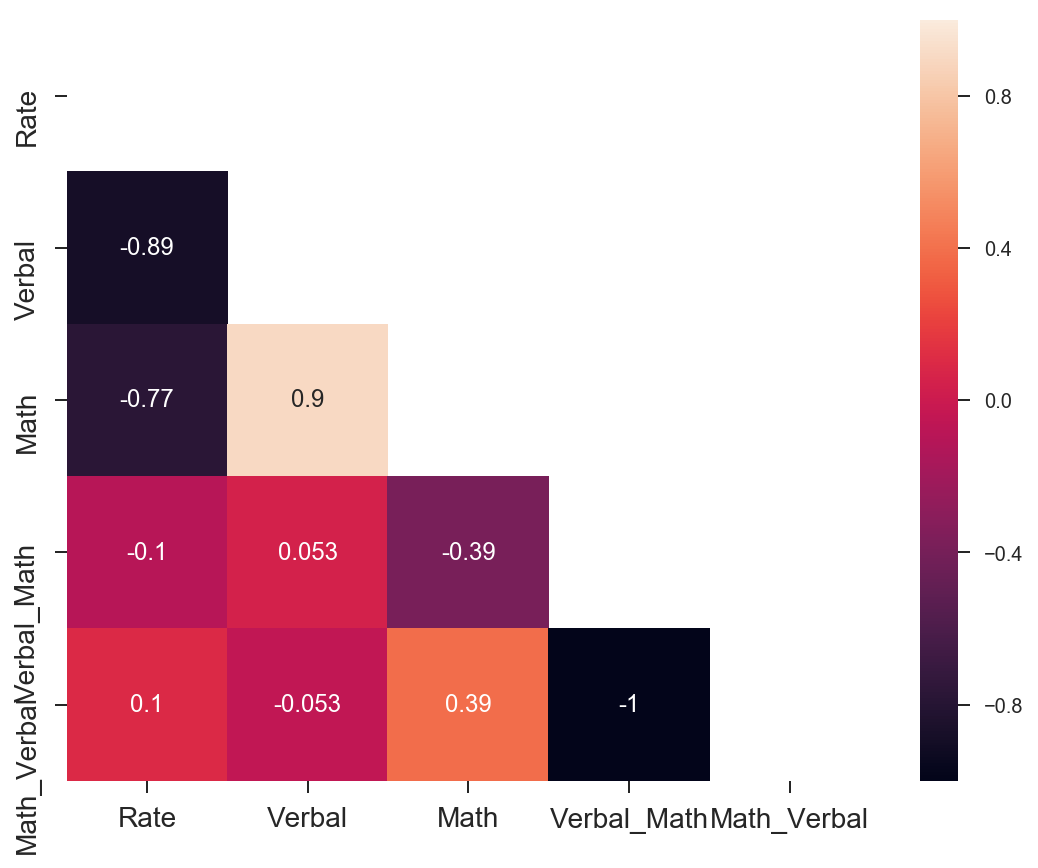

In [68]:
df_corr = df.corr()
fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [45]:
df.describe()

,Rate,Verbal,Math,Verbal_Math,Math_Verbal
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231,-0.519231
std,27.301788,33.236225,36.014975,15.729939,15.729939
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,504.000000,-6.000000,-4.250000
50%,33.500000,526.500000,521.000000,0.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


1. Count is the number of observations for each feature
2. mean is the sum of the values of the observations for each feature divide by the length
3. std is the standard deviation is how spread out the observations are
4. min is the minimum value of the observations
5. 25% is the first quartile(Q1)is defined as the middle number between the smallest number and the median of the data set.
6. 50% is the second quartile (Q2) is the median of the data.
7. 75% is the third quartile (Q3) is the middle value between the median and the highest value of the data set.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

1. correlation is simply a representation of covariance so the result must lay between -1 (perfectly inversely correlated) and +1 (perfectly positively correlated), noting that a value close to zero means that two variables are uncorrelated.
compare whether two variables 'correlate' more than two others, simply by comparing their correlation.

2.The process to convert the covariance into the correlation is to 'normalize' the covariance: you divide the covariance by something that represents the diversity and scale in both the covariates, and end up with a value that is assured to be between -1 and 1: the correlation

--extract the variances from the diagonal elements of the covariance matrix. Then invert the matrix to form the diagonal matrix with diagonal elements that are the reciprocals of the standard deviations

3.The problem with covariances is that they are hard to compare: when you calculate the covariance of a set of heights and weights, as expressed in (respectively) meters and kilograms, you will get a different covariance from when you do it in other units (which already gives a problem for people doing the same thing with or without the metric system!), but also, it will be hard to tell if (e.g.) height and weight 'covariate better' than, e.g. the length of your toes and fingers, simply because the 'scale' you calculate the covariance on is different. But the correlation matrix has values between -1 and 1

In [46]:
%%html
<div class='tableauPlaceholder' id='viz1508363862618' style='position: relative'><noscript><a href='#'><img alt='SAT SCORE IN THE US ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATSCORE&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='2' /> <param name='site_root' value='' /><param name='name' value='SATSCORE&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATSCORE&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1508363862618');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [47]:
drug=pd.read_csv('drug-use-by-age.csv')
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [48]:
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [49]:
# Yes there are missing values '-'

In [50]:
#drug.replace(to_replace='-', value=np.nan)

It will affects the EDA because if there is no drug use, the frequency cannot be computed

In [51]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [52]:
drug.describe().iloc[:,9:30]

,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,8.411765,1.388235,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,15.000245,0.927283,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2.000000,0.000000,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,3.000000,0.600000,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,3.000000,1.400000,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,4.000000,2.000000,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,52.000000,3.000000,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [53]:
drug.columns


Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [54]:
drug_corr = drug[['age','alcohol-use', 'marijuana-use','cocaine-use','crack-use', 'heroin-use',
'hallucinogen-use', 'inhalant-use','inhalant-frequency', 'pain-releiver-use',
'oxycontin-use', 'tranquilizer-use','stimulant-use','meth-use','sedative-use']].corr()

In [71]:
#sns.heatmap(drug_corr,annot =True)

In [56]:
#I picked features with high frequency

In [57]:
drug_corr1 = drug[['age','alcohol-use', 'marijuana-use', 'pain-releiver-use','hallucinogen-use','stimulant-use','sedative-use']].corr()

In [72]:
#sns.heatmap(drug_corr1,annot =True)

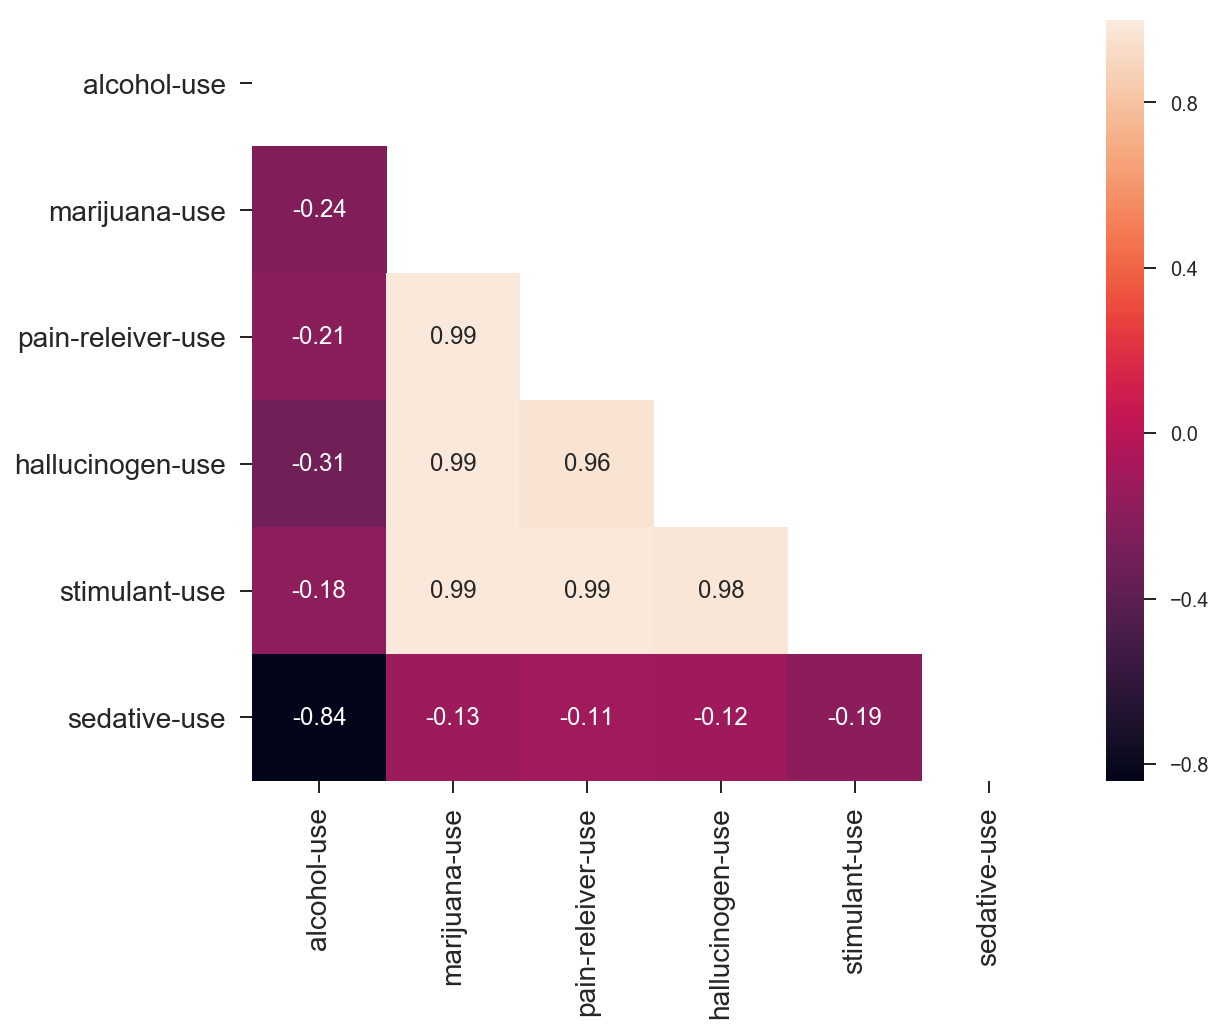

In [70]:
df_corr = drug_corr1.corr()
fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()



### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

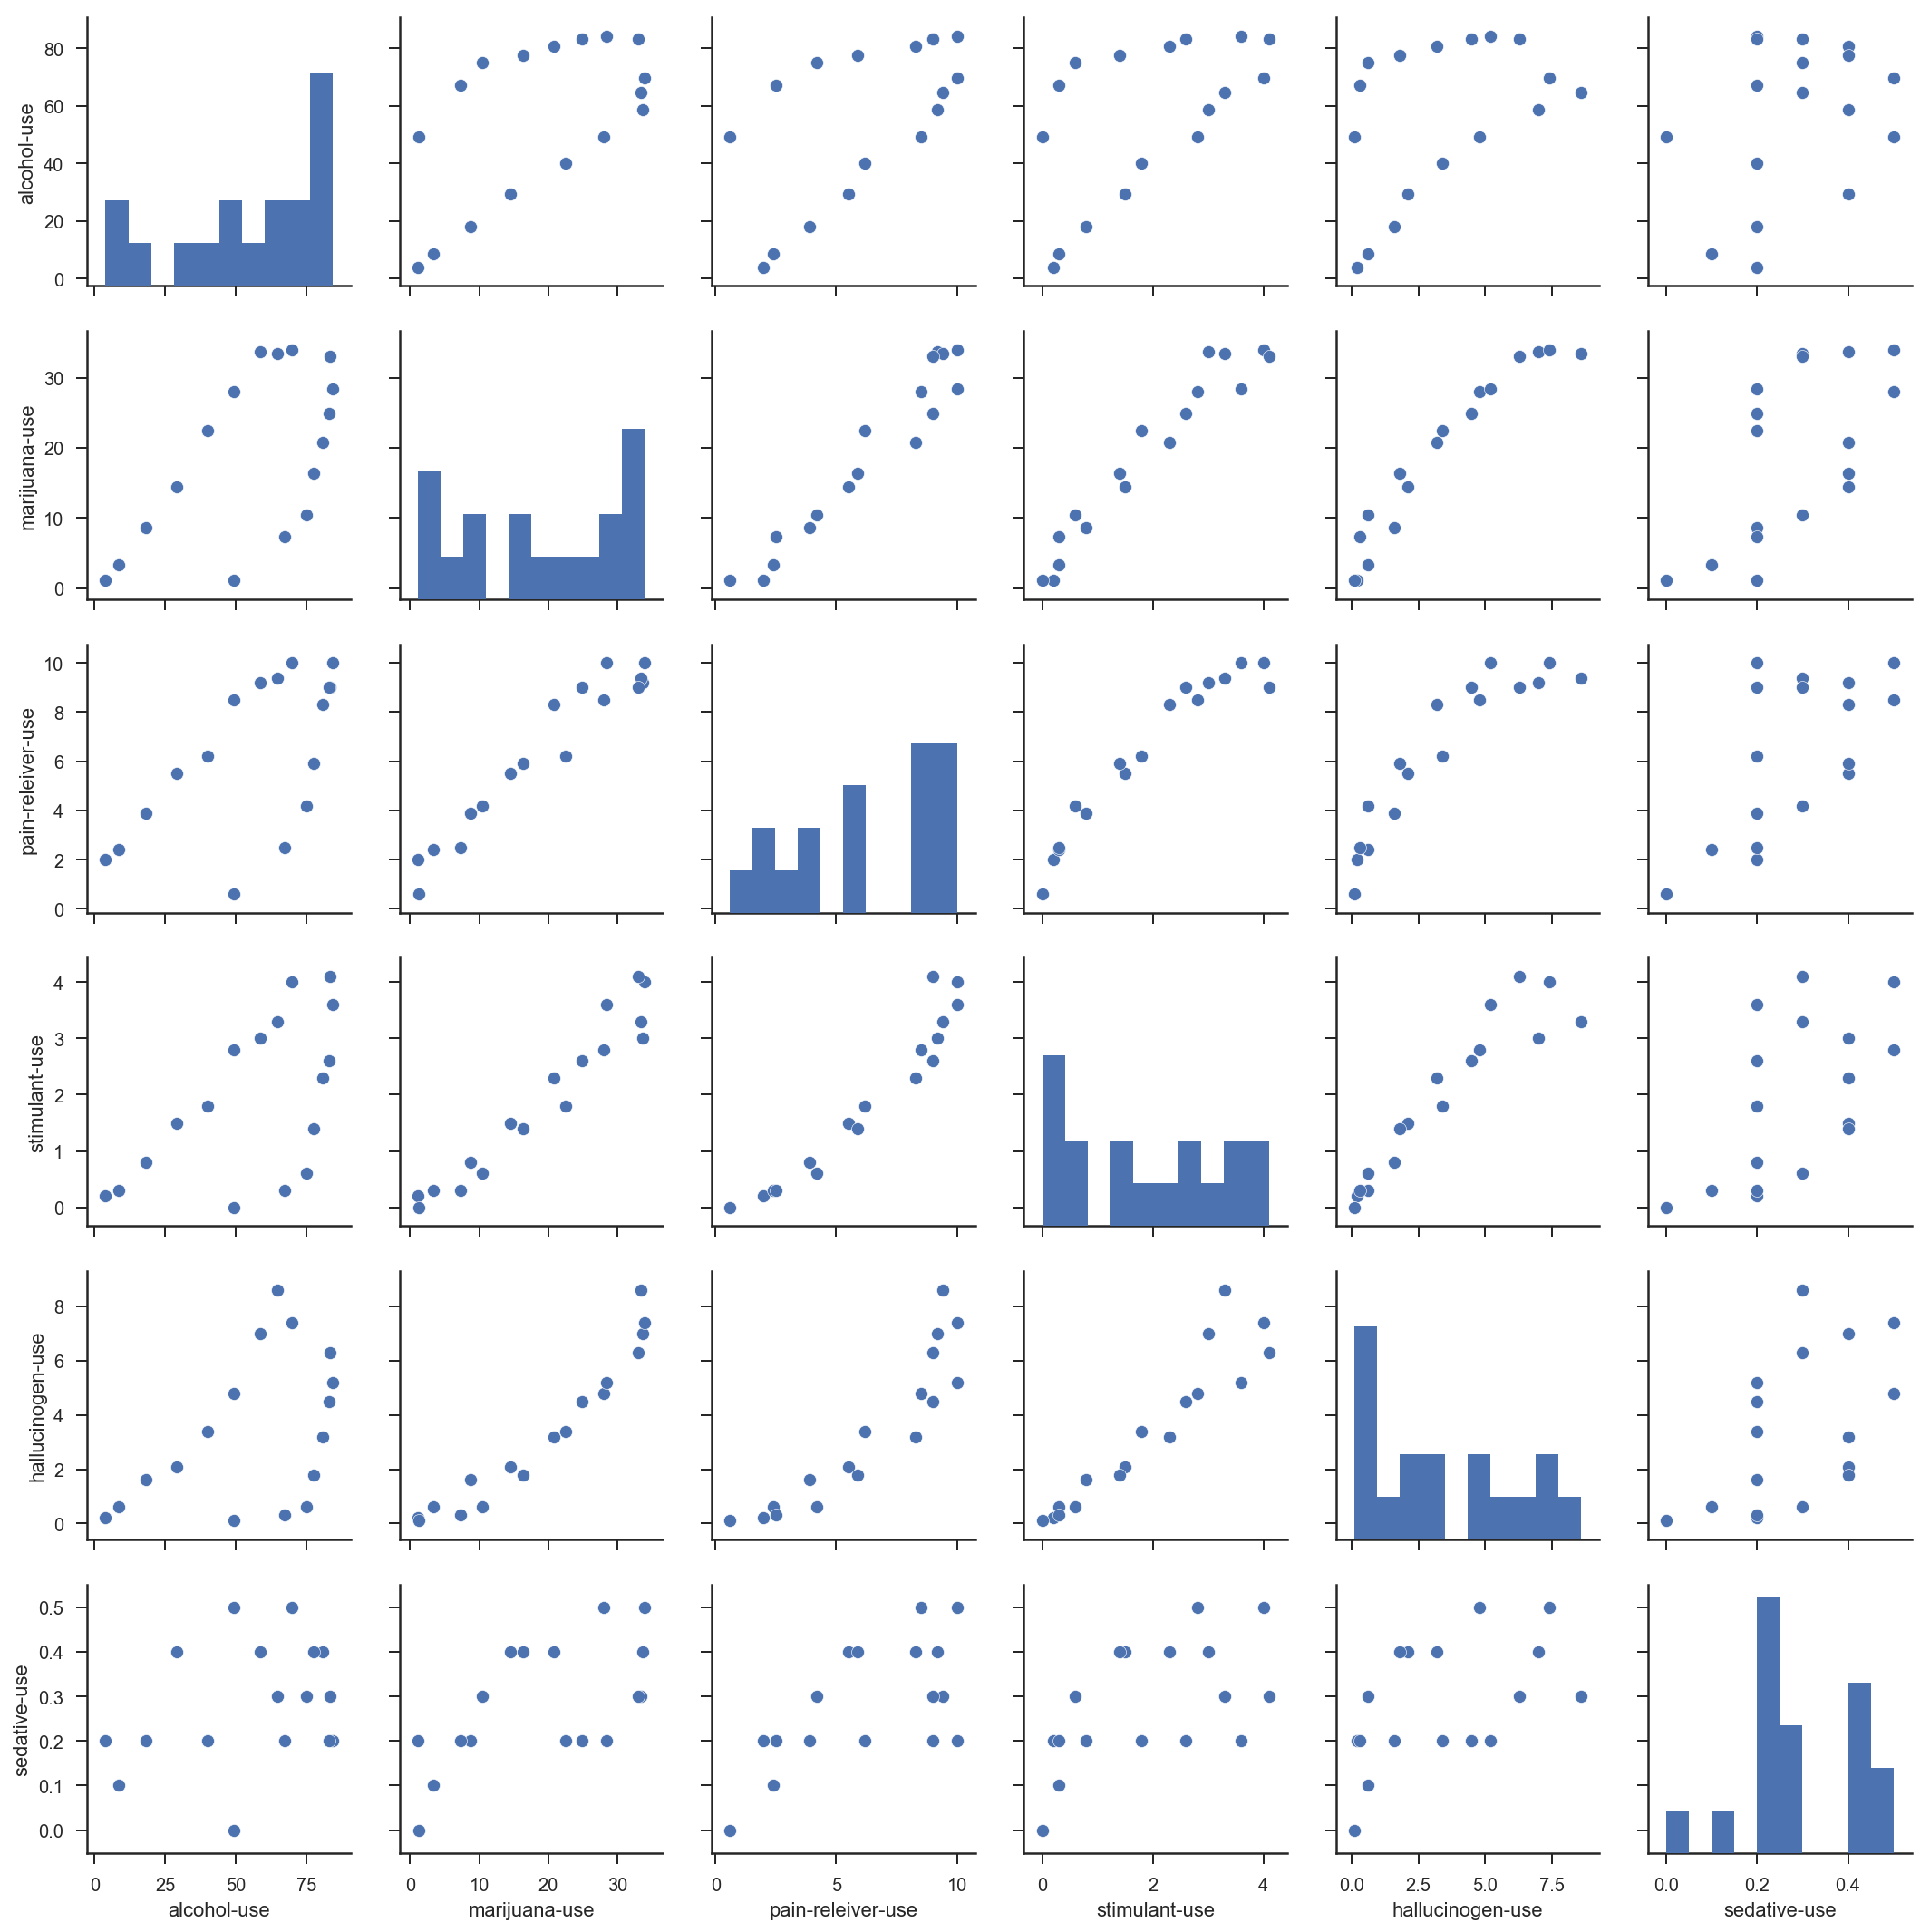

In [59]:
sns.pairplot(drug[['alcohol-use', 'marijuana-use', 'pain-releiver-use','stimulant-use','hallucinogen-use','sedative-use']])

There are a relationship between marijuana use and hallucinogen use, stimulant use and hallucinogen use, pain-releiver use and hallucinogen

In [60]:
rate = [i for i in drug.columns[2:][0::2]]  #column name %-use

In [61]:
drug[rate].mean().sort_values(ascending = False)

alcohol-use          55.429412
marijuana-use        18.923529
pain-releiver-use     6.270588
hallucinogen-use      3.394118
tranquilizer-use      2.805882
cocaine-use           2.176471
stimulant-use         1.917647
inhalant-use          1.388235
oxycontin-use         0.935294
meth-use              0.382353
heroin-use            0.352941
crack-use             0.294118
sedative-use          0.282353
dtype: float64

In [62]:
median = [i for i in drug.columns[2:][1::2]]  #column name %-frequency

In [63]:
drug[median].mean().sort_values(ascending = False)

marijuana-frequency        42.941176
alcohol-frequency          33.352941
stimulant-frequency        31.147059
sedative-frequency         19.382353
pain-releiver-frequency    14.705882
tranquilizer-frequency     11.735294
hallucinogen-frequency      8.411765
dtype: float64

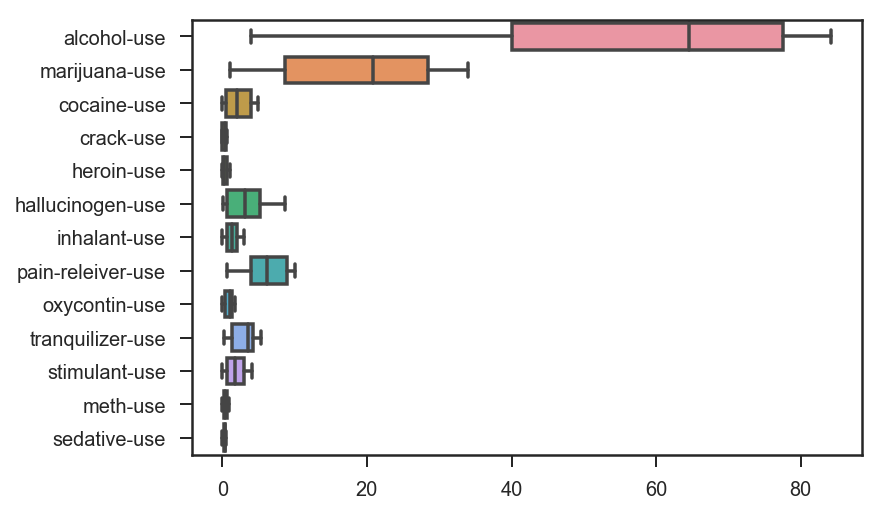

In [64]:
sns.boxplot( data=drug[rate], orient="h")

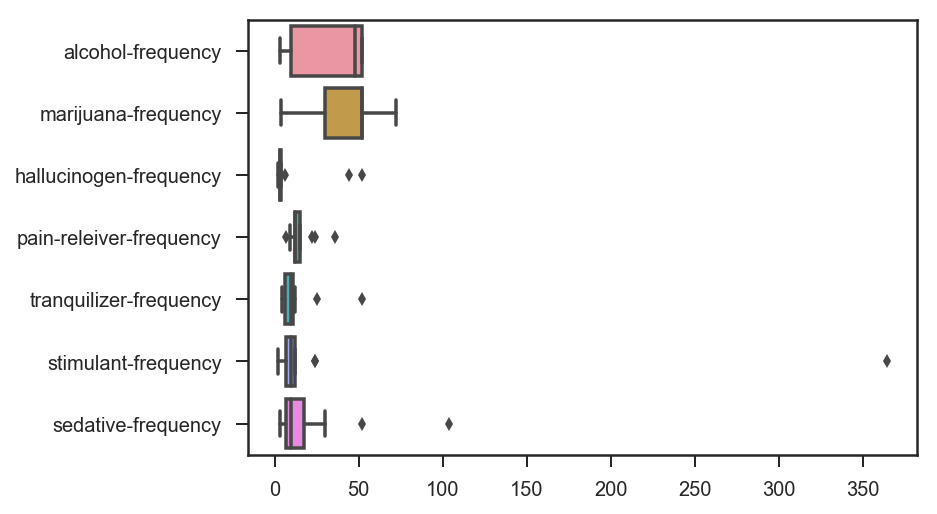

In [65]:
sns.boxplot( data=drug[median], orient="h")

In [66]:
## Answer:
# alcohol and marijuana are the two most popular drug that are choosing to use.
# but heroin has the highest using frequency, and this means that if people addict into heroin, it's hard to give up
# marijuana has the both high using frequency and many users, we can conclude that many people choose to use marijuana
# and for people who choose the marijuana, they use it very often.

In [81]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [82]:
drug['cocaine-frequency'] = pd.to_numeric(drug['cocaine-frequency'], errors='coerce')
drug['heroin-frequency'] = pd.to_numeric(drug['heroin-frequency'], errors='coerce')
drug['meth-frequency'] = pd.to_numeric(drug['meth-frequency'], errors='coerce')
drug['oxycontin-frequency'] = pd.to_numeric(drug['oxycontin-frequency'], errors='coerce')
drug['crack-frequency'] = pd.to_numeric(drug['crack-frequency'], errors='coerce')
drug['inhalant-frequency'] = pd.to_numeric(drug['inhalant-frequency'], errors='coerce')

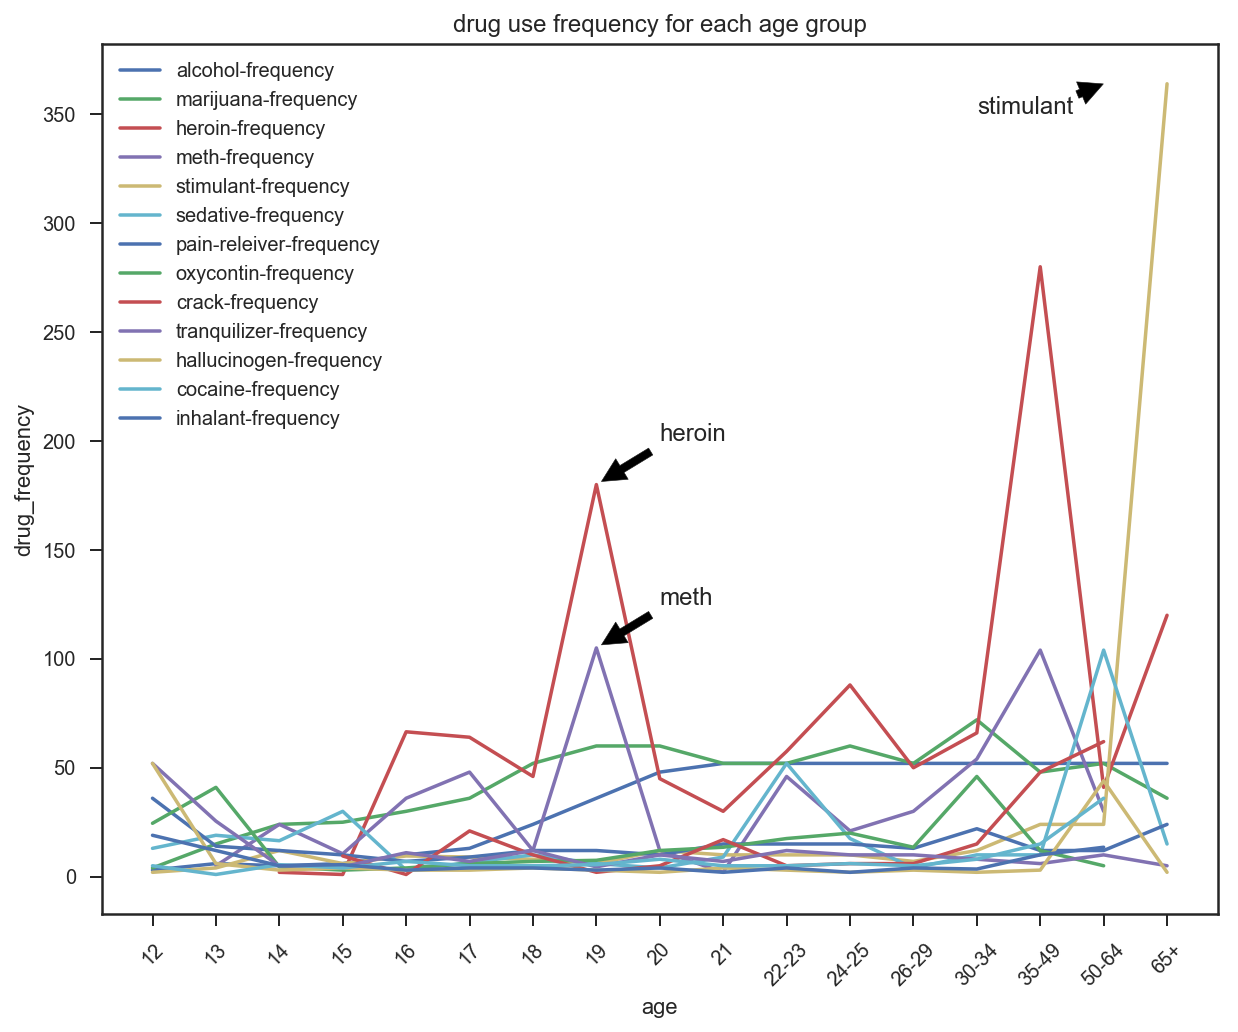

In [83]:
plt.figure(figsize=(10,8))
plt.plot(drug['alcohol-frequency'], label='alcohol-frequency')
plt.plot(drug['marijuana-frequency'], label='marijuana-frequency')
plt.plot(drug['heroin-frequency'], label='heroin-frequency')
plt.plot(drug['meth-frequency'], label='meth-frequency')
plt.plot(drug['stimulant-frequency'], label='stimulant-frequency')
plt.plot(drug['sedative-frequency'], label='sedative-frequency')
plt.plot(drug['pain-releiver-frequency'], label='pain-releiver-frequency')
plt.plot(drug['oxycontin-frequency'], label='oxycontin-frequency')
plt.plot(drug['crack-frequency'], label='crack-frequency')
plt.plot(drug['tranquilizer-frequency'], label='tranquilizer-frequency')
plt.plot(drug['hallucinogen-frequency'], label='hallucinogen-frequency')
plt.plot(drug['cocaine-frequency'], label='cocaine-frequency')
plt.plot(drug['inhalant-frequency'], label='inhalant-frequency')
plt.xlabel('age')
plt.ylabel('drug_frequency')
plt.title('drug use frequency for each age group')
plt.legend(loc='upper left')
plt.xticks(range(17), ('12','13','14','15','16','17','18','19','20','21','22-23','24-25','26-29','30-34','35-49','50-64','65+'),rotation=45)

plt.annotate('heroin', xy=(7, 180.0), xytext=(8, 200), arrowprops=dict(facecolor='black', shrink=0.08))
plt.annotate('meth', xy=(7, 105.0), xytext=(8, 125), arrowprops=dict(facecolor='black', shrink=0.08))
plt.annotate('stimulant', xy=(15, 364.0), xytext=(13, 350), arrowprops=dict(facecolor='black',shrink=0.01))

In [ ]:
# the drug use frequency getting down at age 12
# the first peak of drug use frequency is age 19 
# the second peak of grug use frequency is between 35-49
# the use frequency for stimulant is extremely high for age above 64, old people maybe they use it as a kind of medicine

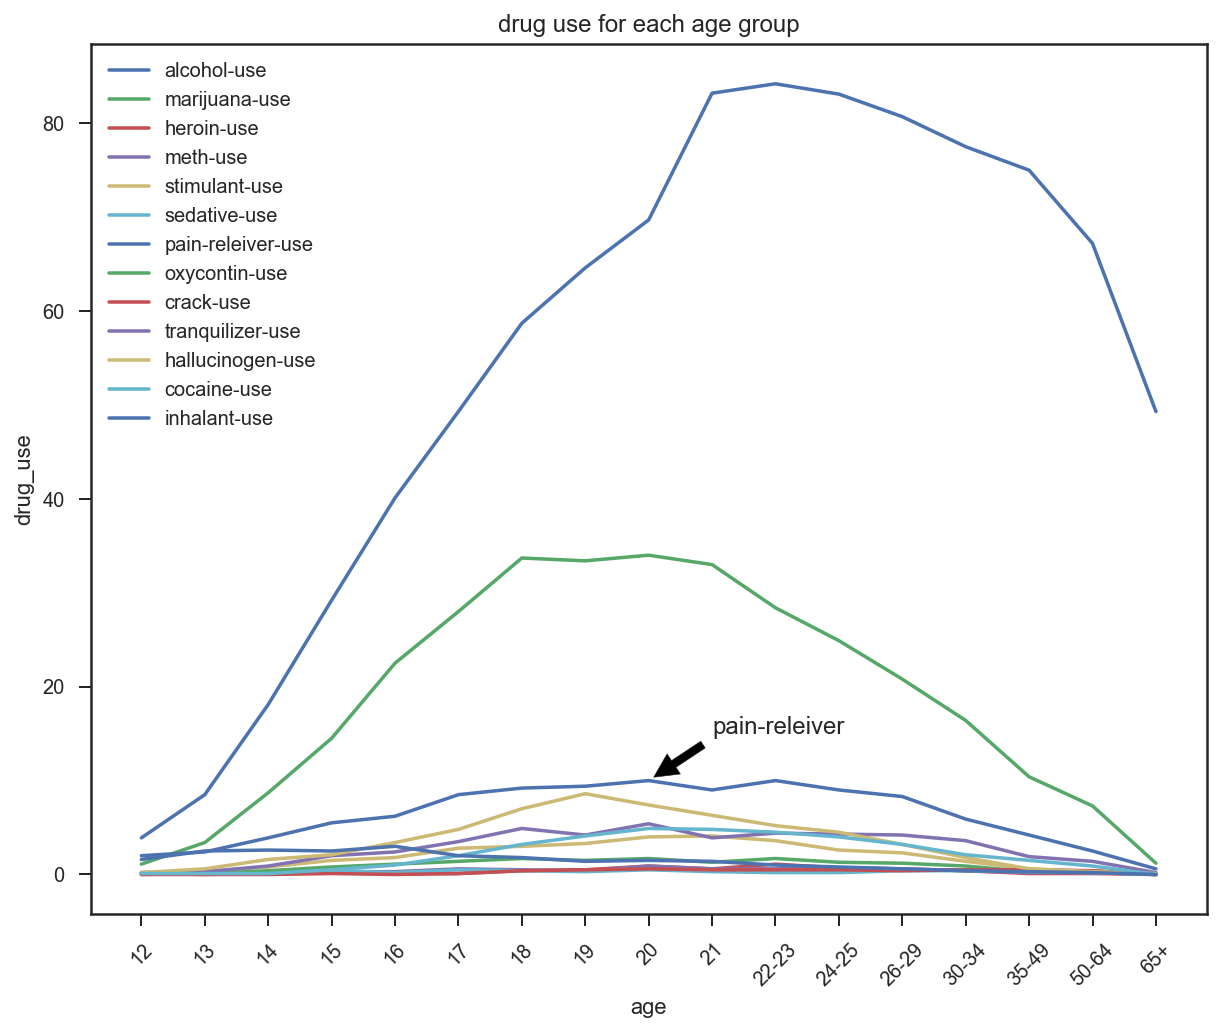

In [84]:
plt.figure(figsize=(10,8))
plt.plot(drug['alcohol-use'], label='alcohol-use')
plt.plot(drug['marijuana-use'], label='marijuana-use')
plt.plot(drug['heroin-use'], label='heroin-use')
plt.plot(drug['meth-use'], label='meth-use')
plt.plot(drug['stimulant-use'], label='stimulant-use')
plt.plot(drug['sedative-use'], label='sedative-use')
plt.plot(drug['pain-releiver-use'], label='pain-releiver-use')
plt.plot(drug['oxycontin-use'], label='oxycontin-use')
plt.plot(drug['crack-use'], label='crack-use')
plt.plot(drug['tranquilizer-use'], label='tranquilizer-use')
plt.plot(drug['hallucinogen-use'], label='hallucinogen-use')
plt.plot(drug['cocaine-use'], label='cocaine-use')
plt.plot(drug['inhalant-use'], label='inhalant-use')
plt.xlabel('age')
plt.ylabel('drug_use')
plt.title('drug use for each age group')
plt.legend(loc='upper left')
plt.xticks(range(17), ('12','13','14','15','16','17','18','19','20','21','22-23','24-25','26-29','30-34','35-49','50-64','65+'),rotation=45)

plt.annotate('pain-releiver', xy=(8, 10.0), xytext=(9, 15), arrowprops=dict(facecolor='black', shrink=0.08))

In [ ]:
# for the Percentage of those in an age group who used drug in tha past 12 month, there isn't obvious peak
# marijuana has the highest use between 18 and 21, the number of people using marijuana is getting down after 21
# the number of people who use alcohol keep increase until age 22-23 and reach a peak, and then decrease.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# Code

## Single-sample t-test

---



**Hypothesis**:  The Alcohol use ($\bar{x}$) is different to marijuana use (MU)

**H0**: $\bar{x} =  MU$

**HA**: $\bar{x}  ! = MU$

For this *one-sample t-test*, the t-statistic is

### $$t = \frac{\bar{x} - MU}{s/\sqrt{n}}$$

In [85]:
n=len('alcohol-use')
n

11

In [86]:
mean_alc = np.mean(drug['alcohol-use'])
mean_alc

55.42941176470588

In [87]:
std_alc = np.std(drug['alcohol-use'])
std_alc

26.076330595025023

In [88]:
se_alc = stats.sem(drug['alcohol-use'])
se_alc

6.519082648756255

In [89]:
mean_maj = np.mean(drug['marijuana-use'])
mean_maj

18.923529411764704

In [90]:
std_maj = np.std(drug['marijuana-use'])
std_maj

11.602663457497957

In [91]:
se_maj = stats.sem(drug['marijuana-use'])
se_maj

2.9006658643744894

In [92]:
x_bar_ALL = np.mean(drug[['alcohol-use', 'marijuana-use', 'pain-releiver-use','stimulant-use','hallucinogen-use','sedative-use']])
x_bar_ALL

alcohol-use          55.429412
marijuana-use        18.923529
pain-releiver-use     6.270588
stimulant-use         1.917647
hallucinogen-use      3.394118
sedative-use          0.282353
dtype: float64

In [93]:
# A:
mean_alc = 55.42941176470588
std_alc = 26.076330595025023
se_alc= 6.519082648756255
mean_maj = 18.923529411764704
std_maj = 11.602663457497957
se_maj= 2.9006658643744894
n= len('alcohol-use')



# H0: x_bar - marijuana = 0
# HA: x_bar - marijuana != 0

t_stat, pvalue = stats.ttest_ind_from_stats(mean_alc, std_alc, 17, mean_maj, std_maj, 17)
print('p_value= ',pvalue)
print('t_stat= ', t_stat)


p_value=  8.9610740668e-06
t_stat=  5.27370650169


Since the pvalue=8.9610740668e-06 is less than the significance(alpha) level =0.05, the hypothesis test is statistically significant.


Reject HO. So alcohol use is different from marijuana use

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

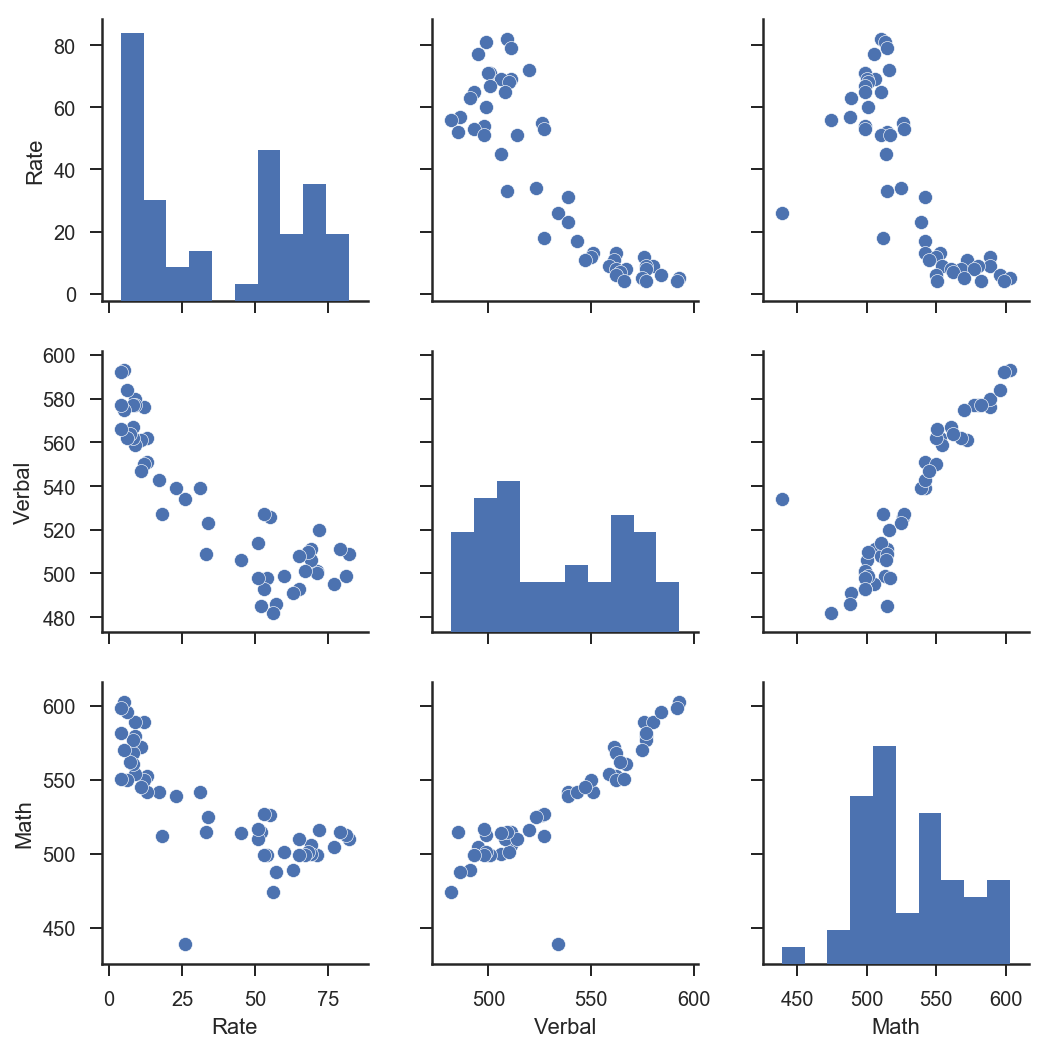

In [94]:
sns.pairplot(df[['Rate', 'Verbal', 'Math']])

In [95]:
sat_outlier = df.loc[(df['Verbal'] <= 540) & (df['Math'] <= 440), :]
sat_outlier

,State,Rate,Verbal,Math,Verbal_Math,Math_Verbal
27,OH,26,534,439,95,-95


In [96]:
satscores1 = df.loc[(df['Verbal'] != 534) & (df['Math'] != 439), :]
satscores1.head()

,State,Rate,Verbal,Math,Verbal_Math,Math_Verbal
0,CT,82,509,510,-1,1
1,NJ,81,499,513,-14,14
2,MA,79,511,515,-4,4
3,NY,77,495,505,-10,10
4,NH,72,520,516,4,-4


In [97]:
print(df.describe(),'\n\n', satscores1.describe())

            Rate      Verbal        Math  Verbal_Math  Math_Verbal
count  52.000000   52.000000   52.000000    52.000000    52.000000
mean   37.153846  532.019231  531.500000     0.519231    -0.519231
std    27.301788   33.236225   36.014975    15.729939    15.729939
min     4.000000  482.000000  439.000000   -30.000000   -95.000000
25%     9.000000  501.000000  504.000000    -6.000000    -4.250000
50%    33.500000  526.500000  521.000000     0.000000     0.000000
75%    63.500000  562.000000  555.750000     4.250000     6.000000
max    82.000000  593.000000  603.000000    95.000000    30.000000 

             Rate      Verbal        Math  Verbal_Math  Math_Verbal
count  51.000000   51.000000   51.000000    51.000000    51.000000
mean   37.372549  531.980392  533.313725    -1.333333     1.333333
std    27.527412   33.565751   33.890111     8.387292     8.387292
min     4.000000  482.000000  474.000000   -30.000000   -15.000000
25%     9.000000  501.000000  505.500000    -6.000000    -4

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [98]:
from scipy.stats import spearmanr, pearsonr
spearmanr(df2['Verbal'],df2['Math'])

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

To calculate Spearman's rank correlation coefficient, you'll need to rank and compare data sets to find Σd2, then plug that value into the standard or simplified version of Spearman's rank correlation coefficient formula.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [99]:
df2.head(30)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [100]:
from scipy.stats import percentileofscore

In [101]:
#Convert Rate to percentiles in the sat scores as a new column.
df2['Rate_perc']= [stats.percentileofscore(df2['Rate'], i) for i in df2['Rate']]
df2.head()

,State,Rate,Verbal,Math,Rate_perc
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.076923
2,MA,79,511,515,96.153846
3,NY,77,495,505,94.230769
4,NH,72,520,516,92.307692


In [102]:
#California
stats.percentileofscore(df2['Rate'],51)

56.730769230769226

In [103]:
#Spearman correlation uses percentile in its calculation .

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

1. The percentile uses median, which is resistant to outliers

In [104]:
drug2=drug.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1699e240>]], dtype=object)

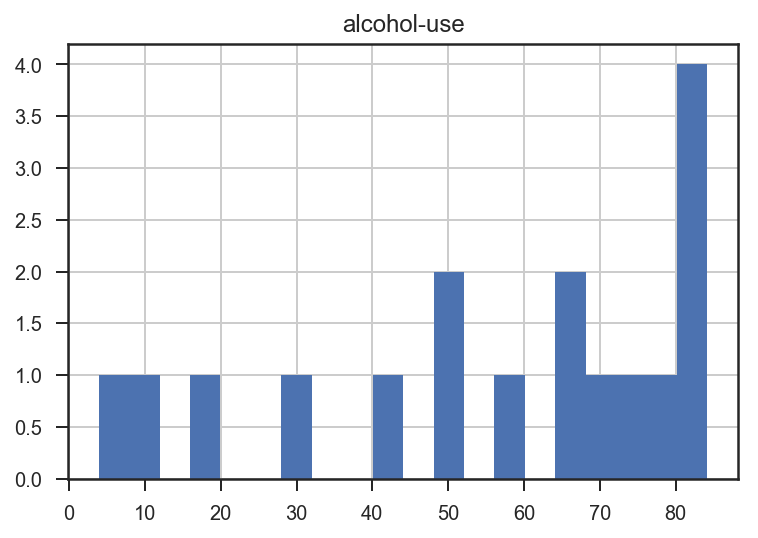

In [105]:
drug2.hist('alcohol-use',bins=20)

In [106]:
drug2['alcohol_perc']= [stats.percentileofscore(drug2['alcohol-use'], i) for i in drug2['alcohol-use']]
drug2.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,alcohol_perc
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,5.882353
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,11.764706
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,17.647059
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,23.529412
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,29.411765


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2183def0>]], dtype=object)

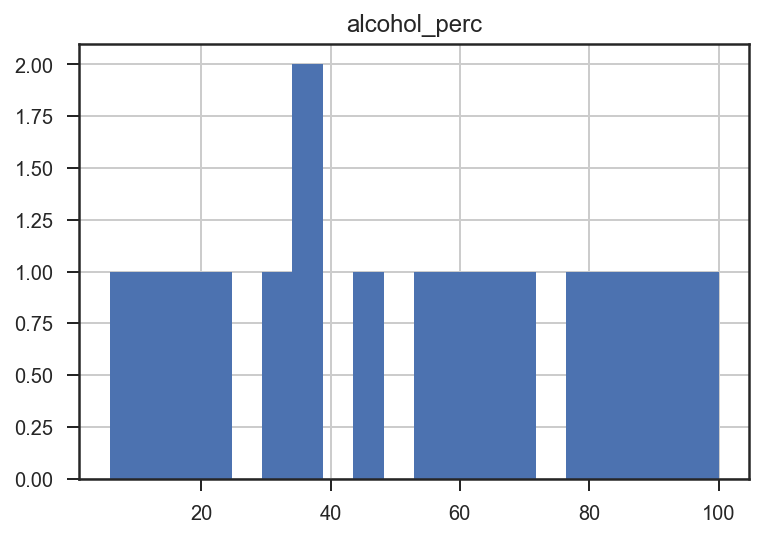

In [107]:
drug2.hist('alcohol_perc',bins=20)

### With the percentile score, the distribution becomes less skewed, and tends to be more normally distributed